___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
df.isnull().sum().sum()

0

# RowNumber, CustomerId, Surname

In [16]:
df = df.drop("RowNumber",axis=1)
df = df.drop("CustomerId",axis=1)
df = df.drop("Surname", axis=1)


# CreditScore

In [12]:
df.groupby("Exited")["CreditScore"].value_counts()

Exited  CreditScore
0       850            190
        678             50
        655             43
        684             43
        667             42
                      ... 
1       832              1
        836              1
        838              1
        840              1
        845              1
Name: CreditScore, Length: 862, dtype: int64

# Geography

In [13]:
df.groupby("Exited")["Geography"].value_counts()

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64

# Gender

In [14]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Tenure

In [17]:
df.groupby("Exited")["Tenure"].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

# Balance

In [18]:
df[df.Balance == 0]["Tenure"].value_counts()

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: Tenure, dtype: int64

# NumOfProducts

In [26]:
df.NumOfProducts.value_counts()

işlem_A    5084
işlem_B    4590
işlem_C     266
işlem_D      60
Name: NumOfProducts, dtype: int64

In [24]:
df['NumOfProducts']=df['NumOfProducts'].replace({1:'x',2:'Y',3:'Z',4:'T'})

In [27]:
df.NumOfProducts.value_counts()

işlem_A    5084
işlem_B    4590
işlem_C     266
işlem_D      60
Name: NumOfProducts, dtype: int64

# HasCrCard

In [28]:
df.groupby("Exited")["HasCrCard"].value_counts()

Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: HasCrCard, dtype: int64

# IsActiveMember

In [29]:
df.groupby("Exited")["IsActiveMember"].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64

# EstimatedSalary

In [30]:
df.EstimatedSalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

# Exited

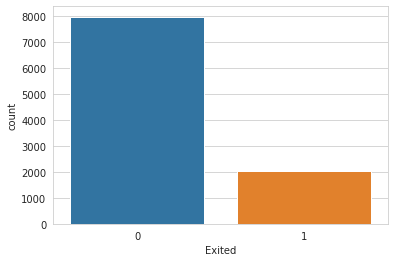

In [31]:
sns.countplot(df.Exited)

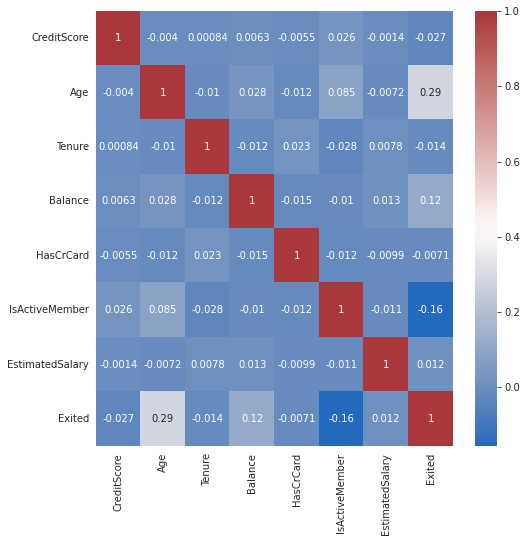

In [32]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot=True,cmap="vlag");

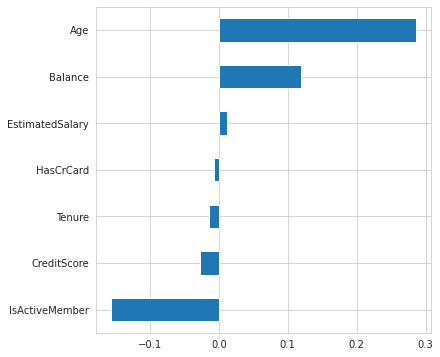

In [33]:
plt.figure(figsize = (6,6))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [34]:
df=pd.get_dummies(df,drop_first=True)
df

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_işlem_B,NumOfProducts_işlem_C,NumOfProducts_işlem_D
0,619,42,2,0.000,1,1,101348.880,1,0,0,0,0,0,0
1,608,41,1,83807.860,0,1,112542.580,0,0,1,0,0,0,0
2,502,42,8,159660.800,1,0,113931.570,1,0,0,0,0,1,0
3,699,39,1,0.000,0,0,93826.630,0,0,0,0,1,0,0
4,850,43,2,125510.820,1,1,79084.100,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,1,0,96270.640,0,0,0,1,1,0,0
9996,516,35,10,57369.610,1,1,101699.770,0,0,0,1,0,0,0
9997,709,36,7,0.000,0,1,42085.580,1,0,0,0,0,0,0
9998,772,42,3,75075.310,1,0,92888.520,1,1,0,1,1,0,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [37]:
seed = 42

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [39]:
X_train.shape

(9000, 13)

In [40]:
X_test.shape

(1000, 13)

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Create The Model

In [44]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(21, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [45]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 800, verbose=1)

Epoch 1/800
64/64 [==============================] - 4s 7ms/step - loss: 0.5890 - recall: 0.0309 - val_loss: 0.4958 - val_recall: 0.0000e+00
Epoch 2/800
64/64 [==============================] - 0s 4ms/step - loss: 0.4689 - recall: 0.0000e+00 - val_loss: 0.4306 - val_recall: 0.0000e+00
Epoch 3/800
64/64 [==============================] - 0s 4ms/step - loss: 0.4330 - recall: 0.0551 - val_loss: 0.3965 - val_recall: 0.1713
Epoch 4/800
64/64 [==============================] - 0s 4ms/step - loss: 0.4147 - recall: 0.2058 - val_loss: 0.3757 - val_recall: 0.2762
Epoch 5/800
64/64 [==============================] - 0s 4ms/step - loss: 0.4035 - recall: 0.2881 - val_loss: 0.3613 - val_recall: 0.3702
Epoch 6/800
64/64 [==============================] - 0s 4ms/step - loss: 0.3929 - recall: 0.3051 - val_loss: 0.3513 - val_recall: 0.3370
Epoch 7/800
64/64 [==============================] - 0s 4ms/step - loss: 0.3858 - recall: 0.3390 - val_loss: 0.3438 - val_recall: 0.4309
Epoch 8/800
64/64 [==========

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                294       
                                                                 
 dense_1 (Dense)             (None, 12)                264       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 643
Trainable params: 643
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.589,0.031,0.496,0.000
1,0.469,0.000,0.431,0.000
2,0.433,0.055,0.396,0.171
3,0.415,0.206,0.376,0.276
4,0.404,0.288,0.361,0.370


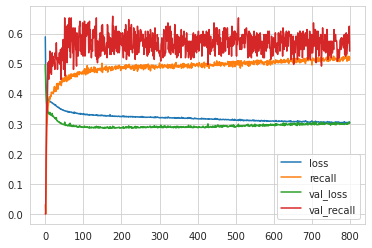

In [48]:
loss_df.plot();

In [49]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3574088215827942
Recall :  0.38725489377975464


In [50]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[771  25]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.39      0.51       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.71      1000
weighted avg       0.84      0.85      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [51]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(21, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [52]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0:class_weights[0],1:class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [53]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight= class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6674 - recall: 0.6755 - val_loss: 0.6375 - val_recall: 0.7901
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5953 - recall: 0.7391 - val_loss: 0.5487 - val_recall: 0.7901
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5553 - recall: 0.7464 - val_loss: 0.5017 - val_recall: 0.7735
Epoch 4/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5385 - recall: 0.7397 - val_loss: 0.4729 - val_recall: 0.7845
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5275 - recall: 0.7421 - val_loss: 0.4985 - val_recall: 0.8343
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5179 - recall: 0.7488 - val_loss: 0.4415 - val_recall: 0.7735
Epoch 7/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5129 - recall: 0.7439 - val_loss: 0.4938 - val_recall: 0.8343
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.667,0.676,0.638,0.790
1,0.595,0.739,0.549,0.790
2,0.555,0.746,0.502,0.773
3,0.538,0.740,0.473,0.785
4,0.527,0.742,0.499,0.834


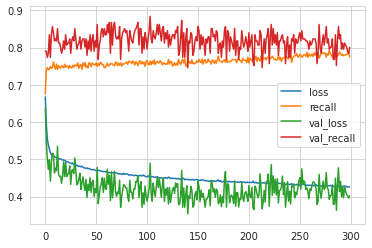

In [55]:
loss_df.plot();

In [56]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.44296950101852417
Recall :  0.7696078419685364


In [57]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[633 163]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [58]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [60]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [61]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.4191 - recall: 0.2603 - val_loss: 0.3431 - val_recall: 0.3978
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3818 - recall: 0.3953 - val_loss: 0.3302 - val_recall: 0.4254
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3705 - recall: 0.4195 - val_loss: 0.3197 - val_recall: 0.5635
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3672 - recall: 0.3977 - val_loss: 0.3153 - val_recall: 0.4696
Epoch 5/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3632 - recall: 0.3947 - val_loss: 0.3254 - val_recall: 0.4365
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3620 - recall: 0.3929 - val_loss: 0.3112 - val_recall: 0.4586
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3546 - recall: 0.4056 - val_loss: 0.3121 - val_recall: 0.4199
Epoch 8/1000
254/254

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.419,0.260,0.343,0.398
1,0.382,0.395,0.330,0.425
2,0.371,0.419,0.320,0.564
3,0.367,0.398,0.315,0.470
4,0.363,0.395,0.325,0.436


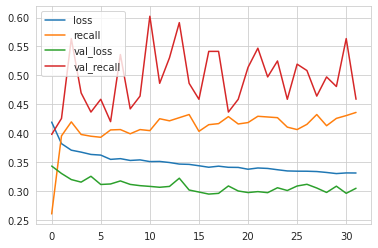

In [63]:
loss_df.plot();

In [64]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3517692983150482
Recall :  0.45588234066963196


In [65]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[766  30]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Add Dropout Layer

In [66]:
from tensorflow.keras.layers import Dropout

In [67]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [68]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.5718 - recall: 0.0581 - val_loss: 0.4571 - val_recall: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5005 - recall: 0.0024 - val_loss: 0.4267 - val_recall: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4844 - recall: 0.0000e+00 - val_loss: 0.4114 - val_recall: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4756 - recall: 0.0000e+00 - val_loss: 0.4022 - val_recall: 0.0000e+00
Epoch 5/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4714 - recall: 0.0000e+00 - val_loss: 0.4057 - val_recall: 0.0000e+00
Epoch 6/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4538 - recall: 0.0054 - val_loss: 0.3900 - val_recall: 0.0000e+00
Epoch 7/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4532 - recall: 0.0333 - val_loss: 0.3835 - val

# Final Model and Model Deployment

In [69]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [70]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [71]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [72]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
71/71 [==============================] - 1s 7ms/step - loss: 0.4747 - recall: 0.0715 - val_loss: 0.4041 - val_recall: 0.3578
Epoch 2/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3888 - recall: 0.3541 - val_loss: 0.3721 - val_recall: 0.4118
Epoch 3/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3745 - recall: 0.3988 - val_loss: 0.3714 - val_recall: 0.4902
Epoch 4/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3666 - recall: 0.4250 - val_loss: 0.3650 - val_recall: 0.4853
Epoch 5/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3608 - recall: 0.4315 - val_loss: 0.3623 - val_recall: 0.4755
Epoch 6/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3591 - recall: 0.4299 - val_loss: 0.3594 - val_recall: 0.4853
Epoch 7/1000
71/71 [==============================] - 0s 4ms/step - loss: 0.3528 - recall: 0.4463 - val_loss: 0.3614 - val_recall: 0.5147
Epoch 8/1000
71/71 [==============

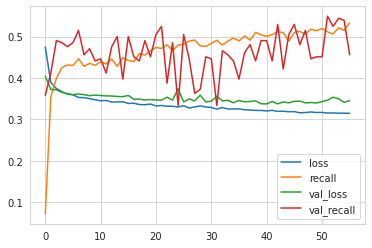

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [74]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762  34]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [75]:
model.save('model_churn_prediction.h5')

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model_cancer = load_model('model_churn_prediction.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [78]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_işlem_B,NumOfProducts_işlem_C,NumOfProducts_işlem_D
0,619,42,2,0.000,1,1,101348.880,0,0,0,0,0,0


In [79]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.538     , 0.32432432, 0.2       , 0.        , 1.        ,
        1.        , 0.50673489, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [80]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

array([[0]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___